In [120]:


import pandas as pd
import numpy as np
from PIL import Image
from sklearn.datasets import fetch_olivetti_faces
import matplotlib.pyplot as plt

In [121]:
faces = fetch_olivetti_faces()

Printing the faces of all 40 subjects

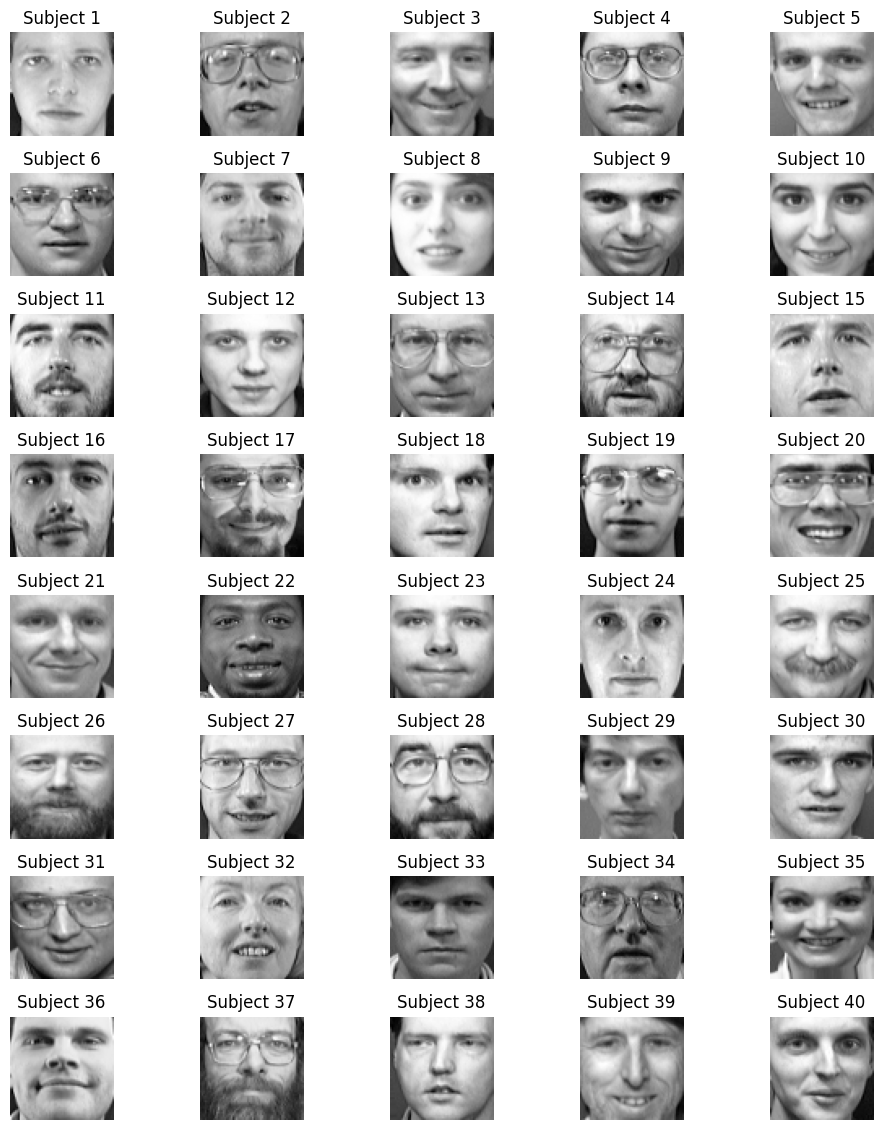

In [122]:
rows = 8
cols = 5

fig, axes = plt.subplots(rows, cols, figsize=(10, 12))
for i, ax in enumerate(axes.flat):
    ax.imshow(faces["images"][0 + i * 10], cmap="gray")
    ax.set_axis_off()
    ax.set_title(f"Subject {i+1}")
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

In [123]:
df = pd.DataFrame(
    data=np.concatenate((faces["target"][:, np.newaxis], faces["data"]), axis=1),
    columns=["Subject"] + [f"Pixel_{_}" for _ in range(1, 4097)],
)
df["Subject"] = df["Subject"].astype("int")
df.head()

,Subject,Pixel_1,Pixel_2,Pixel_3,Pixel_4,Pixel_5,Pixel_6,Pixel_7,Pixel_8,Pixel_9,Pixel_10,Pixel_11,Pixel_12,Pixel_13,Pixel_14,Pixel_15,Pixel_16,Pixel_17,Pixel_18,Pixel_19,Pixel_20,Pixel_21,Pixel_22,Pixel_23,Pixel_24,Pixel_25,Pixel_26,Pixel_27,Pixel_28,Pixel_29,Pixel_30,Pixel_31,Pixel_32,Pixel_33,Pixel_34,Pixel_35,Pixel_36,Pixel_37,Pixel_38,Pixel_39,...,Pixel_4057,Pixel_4058,Pixel_4059,Pixel_4060,Pixel_4061,Pixel_4062,Pixel_4063,Pixel_4064,Pixel_4065,Pixel_4066,Pixel_4067,Pixel_4068,Pixel_4069,Pixel_4070,Pixel_4071,Pixel_4072,Pixel_4073,Pixel_4074,Pixel_4075,Pixel_4076,Pixel_4077,Pixel_4078,Pixel_4079,Pixel_4080,Pixel_4081,Pixel_4082,Pixel_4083,Pixel_4084,Pixel_4085,Pixel_4086,Pixel_4087,Pixel_4088,Pixel_4089,Pixel_4090,Pixel_4091,Pixel_4092,Pixel_4093,Pixel_4094,Pixel_4095,Pixel_4096
0,0,0.309917,0.367769,0.417355,0.442149,0.528926,0.607438,0.657025,0.677686,0.690083,0.685950,0.702479,0.698347,0.694215,0.698347,0.690083,0.694215,0.690083,0.698347,0.702479,0.702479,0.698347,0.706612,0.710744,0.719008,0.727273,0.756198,0.772727,0.776860,0.776860,0.756198,0.760331,0.780992,0.760331,0.768595,0.756198,0.739669,0.743802,0.739669,0.743802,...,0.756198,0.752066,0.694215,0.690083,0.681818,0.681818,0.657025,0.648760,0.636364,0.632231,0.636364,0.623967,0.619835,0.644628,0.681818,0.685950,0.677686,0.681818,0.673554,0.665289,0.632231,0.582645,0.541322,0.537190,0.537190,0.553719,0.570248,0.611570,0.632231,0.657025,0.665289,0.669421,0.652893,0.661157,0.475207,0.132231,0.148760,0.152893,0.161157,0.157025
1,0,0.454545,0.471074,0.512397,0.557851,0.595041,0.640496,0.681818,0.702479,0.710744,0.702479,0.710744,0.698347,0.702479,0.706612,0.706612,0.714876,0.714876,0.706612,0.698347,0.714876,0.698347,0.723140,0.731405,0.743802,0.756198,0.772727,0.768595,0.785124,0.764463,0.756198,0.731405,0.743802,0.735537,0.719008,0.706612,0.714876,0.719008,0.710744,0.710744,...,0.673554,0.661157,0.652893,0.628099,0.632231,0.644628,0.640496,0.628099,0.632231,0.636364,0.628099,0.619835,0.619835,0.603306,0.590909,0.561983,0.516529,0.533058,0.578512,0.570248,0.561983,0.557851,0.545455,0.111570,0.095041,0.152893,0.152893,0.128099,0.136364,0.132231,0.136364,0.157025,0.136364,0.148760,0.152893,0.152893,0.152893,0.152893,0.152893,0.152893
2,0,0.318182,0.400826,0.491736,0.528926,0.586777,0.657025,0.681818,0.685950,0.702479,0.698347,0.702479,0.706612,0.706612,0.714876,0.710744,0.706612,0.706612,0.706612,0.723140,0.719008,0.719008,0.710744,0.710744,0.752066,0.756198,0.764463,0.785124,0.797521,0.838843,0.826446,0.842975,0.847107,0.830579,0.818182,0.793388,0.768595,0.760331,0.756198,0.739669,...,0.719008,0.714876,0.706612,0.685950,0.665289,0.652893,0.644628,0.636364,0.623967,0.636364,0.657025,0.644628,0.677686,0.681818,0.690083,0.690083,0.690083,0.681818,0.661157,0.652893,0.636364,0.586777,0.545455,0.570248,0.607438,0.603306,0.595041,0.578512,0.607438,0.413223,0.074380,0.132231,0.181818,0.136364,0.128099,0.148760,0.144628,0.140496,0.148760,0.152893
3,0,0.198347,0.194215,0.194215,0.194215,0.190083,0.190083,0.243802,0.404959,0.483471,0.516529,0.537190,0.566116,0.574380,0.586777,0.611570,0.632231,0.640496,0.657025,0.673554,0.694215,0.702479,0.719008,0.727273,0.719008,0.723140,0.710744,0.739669,0.747934,0.756198,0.756198,0.764463,0.772727,0.785124,0.785124,0.805785,0.818182,0.805785,0.809917,0.793388,...,0.400826,0.442149,0.479339,0.512397,0.537190,0.557851,0.566116,0.586777,0.586777,0.615702,0.632231,0.661157,0.681818,0.673554,0.714876,0.710744,0.706612,0.690083,0.681818,0.623967,0.615702,0.586777,0.582645,0.578512,0.590909,0.590909,0.611570,0.628099,0.644628,0.657025,0.652893,0.636364,0.657025,0.685950,0.727273,0.743802,0.764463,0.752066,0.752066,0.739669
4,0,0.500000,0.545455,0.582645,0.623967,0.648760,0.690083,0.694215,0.714876,0.723140,0.731405,0.739669,0.739669,0.764463,0.756198,0.764463,0.785124,0.793388,0.797521,0.814050,0.809917,0.809917,0.818182,0.830579,0.830579,0.842975,0.838843,0.838843,0.838843,0.830579,0.818182,0.805785,0.801653,0.797521,0.793388,0.793388,0.785124,0

In [124]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, random_state=8, test_size=0.1)

In [188]:
%reload_ext autoreload
%autoreload 2
from Eigenfaces import EigenFaces


In [189]:
ef = EigenFaces()

In [190]:
for subject_id in train["Subject"].unique():
    images = train[train["Subject"] == subject_id].iloc[:, 1:]
    ef.add_subject(subject_id, images)

Added eigenfaces of subject 2...
Added eigenfaces of subject 18...
Added eigenfaces of subject 1...
Added eigenfaces of subject 16...
Added eigenfaces of subject 21...
Added eigenfaces of subject 9...
Added eigenfaces of subject 4...
Added eigenfaces of subject 30...
Added eigenfaces of subject 28...
Added eigenfaces of subject 5...
Added eigenfaces of subject 3...
Added eigenfaces of subject 17...
Added eigenfaces of subject 19...
Added eigenfaces of subject 6...
Added eigenfaces of subject 12...
Added eigenfaces of subject 10...
Added eigenfaces of subject 14...
Added eigenfaces of subject 31...
Added eigenfaces of subject 27...
Added eigenfaces of subject 7...
Added eigenfaces of subject 35...
Added eigenfaces of subject 39...
Added eigenfaces of subject 32...
Added eigenfaces of subject 8...
Added eigenfaces of subject 24...
Added eigenfaces of subject 23...
Added eigenfaces of subject 33...
Added eigenfaces of subject 15...
Added eigenfaces of subject 29...
Added eigenfaces of sub

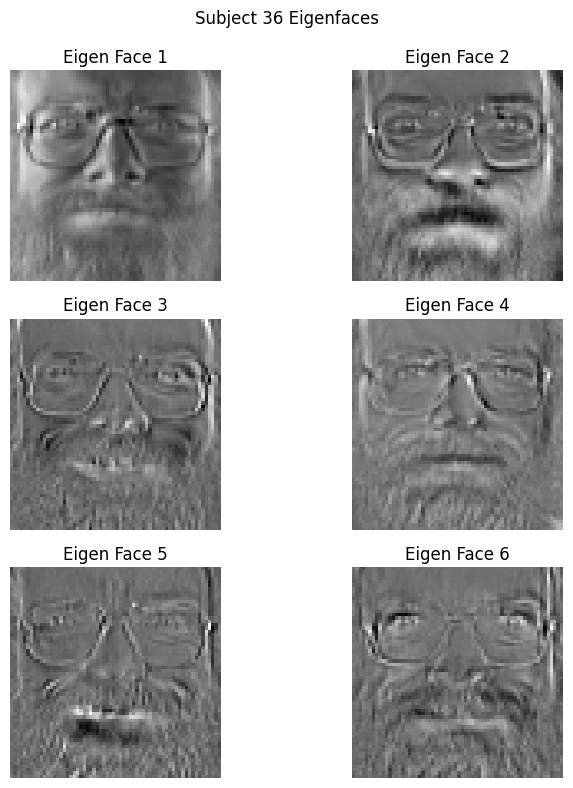

In [191]:
ef.plot_eigen_faces(36)

In [196]:
mis_classified = 0
for _, test_row in test.iterrows():
    true_subject_id = test_row["Subject"]
    test_image = test_row[1:].to_numpy()
    result = ef.recognize(test_image)
    if true_subject_id != result[0]["Subject ID"]:
        print(true_subject_id, result[0])
        mis_classified += 1


In [197]:
print(f"Misclassfied Rate: {mis_classified / test.shape[0]}")

Misclassfied Rate: 0.0
